In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''
In the given dataset days_taken_to_follow_up is calculated by using subtraction of columns (followup_date - lead_created_at).
In some cases (in 299 rows out of total 68,354), this difference is -ve, suggesting lead data was entered after following-up.
Hence these -ve rows are removed from the original data, thus in this entire we will work with 
a dataset called "data_negative_followup_removed.csv"

'''
data=pd.read_csv('data_negative_followup_removed.csv')

In [3]:
data

,id,followup_date,follow_up_time,lead_created_at,lead_create_time,days_taken_to_follow_up,leadId,followup_type,agentId,additional_data,Unnamed: 10,call_duration,Unnamed: 12,Unnamed: 13
0,62493,26-11-2019,20:44:01,26-11-2019,14:52:05-05:00,0,48308,textmessages,2,{'is_incoming': False},{'is_incoming':,0,NaN,NaN
1,62494,26-11-2019,20:47:05,26-11-2019,14:52:05-05:00,0,48308,textmessages,2,{'is_incoming': True},{'is_incoming':,0,NaN,NaN
2,62495,26-11-2019,20:48:01,26-11-2019,14:52:05-05:00,0,48308,textmessages,2,{'is_incoming': False},{'is_incoming':,0,NaN,NaN
3,62496,26-11-2019,21:03:39,26-11-2019,14:52:05-05:00,0,48308,textmessages,2,{'is_incoming': True},{'is_incoming':,0,NaN,NaN
4,62497,26-11-2019,21:11:19,26-11-2019,14:52:05-05:00,0,48308,textmessages,2,{'is_incoming': False},{'is_incoming':,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68050,27052,02-10-2020,17:40:01,17-02-2013,10:05:00-05:00,2784,41777,emails,9,{'is_incoming': False},{'is_incoming':,0,NaN,NaN
68051,27053,02-10-2020,17:40:09,17-02-2013,10:05:00-05:00,2784,41777,emails,9,{'is_incoming': False},{'is_incoming':,0,NaN,NaN
68052,53564,20-11-2020,21:23:08,03-04-2013,18:05:00-04:00,2788,42097,textmessages,8,{'is_incoming': False},{'is_incoming':,0,NaN,NaN
68053,27024,09-10-2020,15:40:38,17-02-2013,10:05:00-05:00,2791,41777,emails,7,{'is_incoming': False},{'is_incoming':,0,NaN,NaN


# Measure 1: ADF (Average Follow-up Days) 

## (ADF should be low)

### a. Mean is sensitive to outlers, in this dataset 'days_taken_to_follow_up' has a lot of outliers therefore use median for afd calculation



### b.  median of days taken to contact the customer from excel == 59


In [4]:
grp1=data.groupby(['agentId','leadId'])['days_taken_to_follow_up'].agg(['count',np.median])
grp1.to_csv('GRP1.csv') 
df_grp1=pd.read_csv('GRP1.csv')

grp2=df_grp1.groupby('agentId')['median'].median()
grp2.to_csv('GRP2.csv')
df_grp2=pd.read_csv('GRP2.csv')

df_grp2 = df_grp2.rename(columns={'median': 'ADF'})

ADF=df_grp2
ADF.sort_values(by='ADF')

,agentId,ADF
1,2,25.0
5,6,25.0
7,8,25.0
8,9,25.0
4,5,32.5
6,7,66.5
0,0,112.0
2,3,387.5
3,4,435.0
9,10,546.5


In [5]:
ADF['ADF'].median()  

49.5

Text(0.5, 1.0, 'ADF for each Agent')

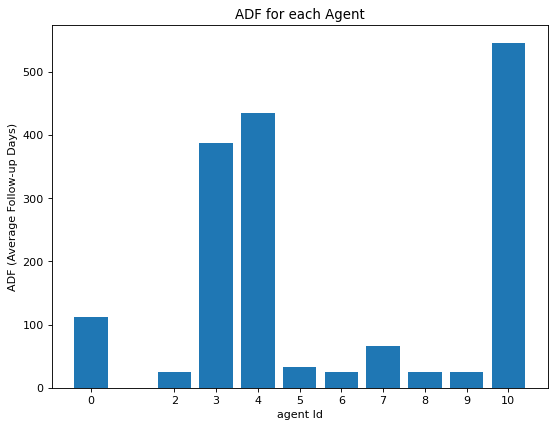

In [6]:
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(ADF['agentId'],ADF['ADF'])
plt.xlabel('agent Id')
plt.ylabel('ADF (Average Follow-up Days)')
plt.xticks([0,2,3,4,5,6,7,8,9,10])
plt.title('ADF for each Agent')

# Measure 2: PLF ( Percentage Leads Followed-up)

In [7]:
data['leadId'].nunique()

6689

In [8]:
no_leads_fol=100*(df_grp1.groupby('agentId')['leadId'].count()/6689)
no_leads_fol.to_csv('NLF.csv')
PLF=pd.read_csv('NLF.csv')
PLF =PLF.rename(columns={'leadId': 'PLF'})
PLF.sort_values(by='PLF')

,agentId,PLF
0,0,0.074750
2,3,5.112872
5,6,5.247421
6,7,5.441770
4,5,5.950067
7,8,8.491553
1,2,13.066228
8,9,13.096128
9,10,21.288683
3,4,23.889969


In [9]:
PLF['PLF'].mean()

10.165944087307519

Text(0.5, 1.0, 'Pie-Chart: Leads each agent follows-up')

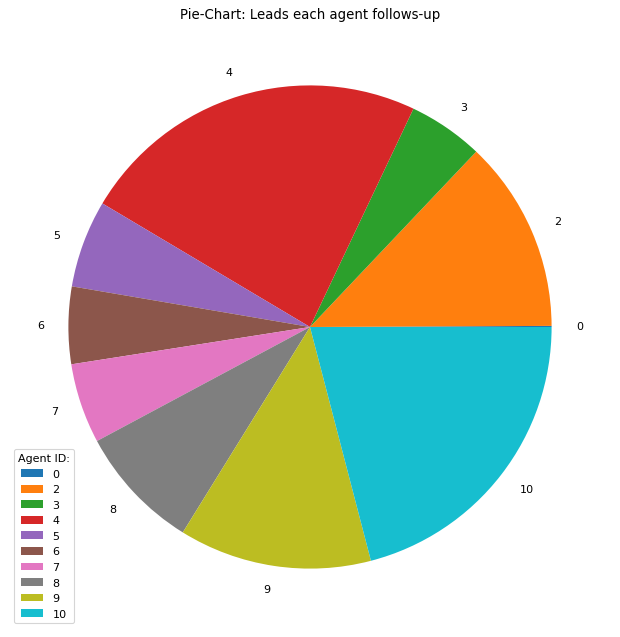

In [10]:
plt.figure(figsize=(10, 10), dpi=80)
plt.pie(PLF['PLF'],labels=PLF['agentId'])
plt.legend(title = "Agent ID:")
plt.title('Pie-Chart: Leads each agent follows-up')

# Measure 3: CDM (Call Duration Minutes) calculations

## (High CDM means high chances of conversion of the customer)

In [11]:
sec_call_average_if_picked=data[data['call_duration']!=0].groupby(['agentId'])['call_duration'].mean()
min_call_average_if_picked=sec_call_average_if_picked/60
min_call_average_if_picked.to_csv('mins_call')
CDM=pd.read_csv('mins_call')
CDM = CDM.rename(columns={'call_duration': 'CDM'})

b1=pd.DataFrame({'agentId':[0,3,5],'CDM':[0,0,0]})
CDM= CDM.append(b1,ignore_index=True)

CDM.sort_values(by='CDM')

,agentId,CDM
7,0,0.000000
8,3,0.000000
9,5,0.000000
1,4,1.314250
0,2,1.330747
4,8,1.645668
6,10,2.196067
2,6,2.277820
5,9,2.803636
3,7,3.617094


([<matplotlib.axis.YTick at 0x2009eba0b80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

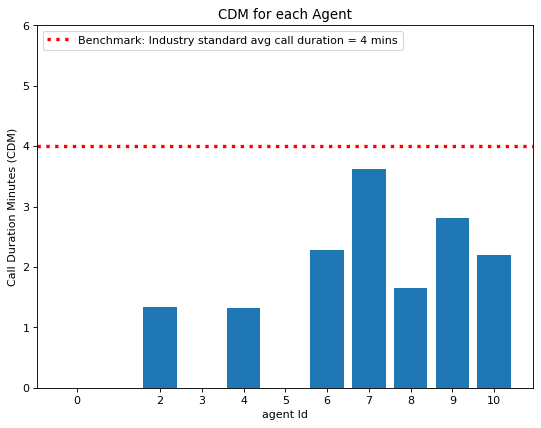

In [12]:
#to draw bar plot
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(CDM['agentId'],CDM['CDM'])
plt.xlabel('agent Id')
plt.ylabel('Call Duration Minutes (CDM)')
plt.xticks([0,2,3,4,5,6,7,8,9,10])
plt.yticks(range(0,7))
plt.title('CDM for each Agent')

#to add benchmark line to the bar graph

plt.axhline(y=4, color='red', linestyle='dotted', linewidth=3, label= 'Benchmark: Industry standard avg call duration = 4 mins')
plt.legend(loc = 'upper left')
plt.yticks(range(0,7))

# Measure 4: CLEF (Call Efficiency in percentage) 

## CLEF should be high, high efficiency means less time spent trying to figure out interested customers 

### (Notice that for AGENT 0,3,5 they called a lot of people but no call was not picked by any customer, therefore use better methods text/messages to convince people to pick the call)



In [13]:
calls_picked= data[data['call_duration']!=0].groupby(['agentId'])['call_duration'].count()
calls_picked.to_csv('calls_picked.csv')

In [14]:
cd=pd.read_csv('calls_picked.csv')
cd = cd.rename(columns={'call_duration': 'calls_picked_up'})
#cd

a1=pd.DataFrame({'agentId':[0,3,5],'calls_picked_up':[0,0,0]})
a2= cd.append(a1,ignore_index=True)
#a2

all_calls= data.groupby(['agentId'])['call_duration'].count()
#all_calls

all_calls.to_csv('all_calls.csv')
a3=pd.read_csv('all_calls.csv')

a3 = a3.rename(columns={'call_duration': 'tot_calls_placed'})
#a3

CLEF=pd.merge(a2,a3,on='agentId')
#CLEF

CLEF['CLEF']=(CLEF['calls_picked_up']/CLEF['tot_calls_placed'])*100
CLEF.sort_values(by='CLEF')


,agentId,calls_picked_up,tot_calls_placed,CLEF
7,0,0,115,0.000000
8,3,0,528,0.000000
9,5,0,11241,0.000000
3,7,39,7819,0.498785
5,9,110,9281,1.185217
0,2,58,4086,1.419481
2,6,133,5606,2.372458
6,10,356,11363,3.132975
1,4,945,15284,6.182936
4,8,227,2732,8.308931


Text(0.5, 1.0, 'CLEF for each Agent')

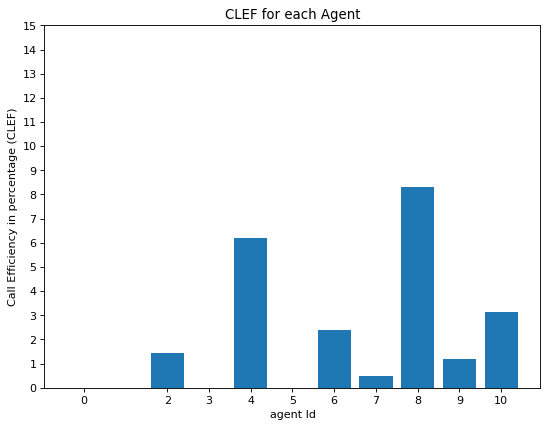

In [15]:
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(CLEF['agentId'],CLEF['CLEF'])
plt.xlabel('agent Id')
plt.ylabel('Call Efficiency in percentage (CLEF)')
plt.xticks([0,2,3,4,5,6,7,8,9,10])
plt.yticks(range(0,16))
plt.title('CLEF for each Agent')